# **Mini Projects (Python): Analyzing the Impact of Handwashing on Mortality Rates**

### **Executive Summary**

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

I will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

### **Business Question and Objectives**
1. What year had the highest yearly proportion of deaths at each clinic?
2. What are the mean proportions of deaths before and after handwashing from the monthly data?
3. Analyze the difference in the mean monthly proportion of deaths and calculate a 95% confidence interval

### **Technique Used**
- **Proportion Calculation**: The proportion of deaths is calculated for both yearly and monthly datasets by dividing the number of deaths by the number of births, allowing for the assessment of mortality rates relative to live births.

- **Data Visualization (Line Plot)**: The line plot to visualize the trend of the proportion of deaths over the years for each clinic, facilitating the identification of patterns and variations in mortality rates across different clinics.

- **Grouping and Aggregation (Mean Calculation)**: Groups the monthly data based on whether handwashing was introduced and calculates the mean proportion of deaths for each group, summarizing the impact of handwashing on mortality.

- **Bootstrapping (Resampling Technique)**: Implementation of bootstrapping by repeatedly sampling with replacement from the proportions of deaths before and after handwashing to estimate the mean difference in mortality rates.

- **Confidence Interval Estimation**: Calculates a 95% confidence interval for the mean difference in proportions of deaths using the quantiles of the bootstrap samples, providing a range that reflects the uncertainty around the estimated effect of handwashing.


### **Key Findings**

1. **Year with the Highest Yearly Proportion of Deaths at Each Clinic**
    - Clinic 1: The year 1842 had the highest proportion of deaths, peaking at approximately 0.16.
    - Clinic 2: The highest proportion of deaths occurred in 1842 as well, but at a lower peak of around 0.08.

2. **Mean Proportions of Deaths Before and After Handwashing**
    - Before Handwashing: The mean proportion of deaths was approximately 0.105 (or 10.5%).
    - After Handwashing: The mean proportion of deaths significantly decreased to about 0.021 (or 2.1%).
    - This indicates a substantial reduction in the average monthly proportion of deaths after the introduction of handwashing.

3. **Difference in Mean Monthly Proportion of Deaths and 95% Confidence Interval**
    - The analysis shows a significant reduction in the mean monthly proportion of deaths after handwashing was introduced.
    - The 95% confidence interval for the difference in mean proportions is from approximately -0.1009 to -0.0675.
    - This interval indicates that the reduction in deaths is statistically significant, as it does not include zero, suggesting that handwashing had a positive impact on reducing mortality rates.


### **Import Libraries**

In [1]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

### **To identify the year with the highest yearly proportion of deaths for each clinic**

In [2]:
# Load and inspect the yearly data
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [3]:
# Add proportion_deaths to the DataFrames
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

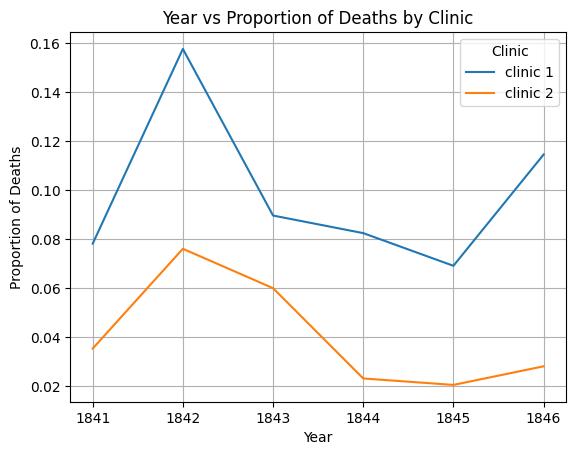

In [4]:
# Add proportion_deaths to the DataFrames
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Plot the year versus proportion deaths and separate by clinic using a for loop
for clinic in yearly['clinic'].unique():
    clinic_data = yearly[yearly['clinic'] == clinic]
    plt.plot(clinic_data['year'], clinic_data['proportion_deaths'], label=clinic)

plt.xlabel('Year')
plt.ylabel('Proportion of Deaths')
plt.title('Year vs Proportion of Deaths by Clinic')
plt.legend(title='Clinic')
plt.grid(True)
plt.show()

In [5]:
# Identify the highest year in the visualization and save the integer year
highest_year = 1842

### **To identify the mean proportions of deaths before and after handwashing based on the monthly data**

In [6]:
# Load and inspect the monthly data
monthly = pd.read_csv("monthly_deaths.csv")
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [7]:
# Add proportion_deaths to the DataFrame
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Add the threshold as the date handwashing was introduced
handwashing_start = '1847-06-01'

# Create a boolean column that shows True after the date handwashing was introduced
monthly['handwashing_started'] = monthly['date'] >= handwashing_start

In [8]:
# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary = monthly.groupby('handwashing_started').agg(
    mean_proportion_deaths=('proportion_deaths', 'mean')
).reset_index()

print(monthly_summary)

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093


### **Examine the variation in the average monthly proportion of deaths and compute a 95% confidence interval for the results**

In [9]:
# Split the monthly data into before and after handwashing was introduced
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

In [10]:
# Perform a bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculate a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

0.025   -0.100928
0.975   -0.067472
dtype: float64
